<a href="https://colab.research.google.com/github/taravatp/Panopic-Feature-Pyramid-Network/blob/main/training/train_inatance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install and importing required packages

In [ ]:
cd /content/drive/MyDrive/panoptic_FPN

In [ ]:
!pip install import_ipynb 

In [ ]:
import torch

import import_ipynb
from coco_instance_dataset import coco_instance_dataset
from nodels.instance_model import get_model_instance_segmentation
import utils

import matplotlib.pyplot as plt
import time
import numpy as np

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Instantiating the Dataset/Model/Optimizer/HyperParameters

In [ ]:
batch_size = 2
dataset_train = coco_instance_dataset(flag='train')
dataset_test = coco_instance_dataset(flag='test')

data_loader_train = torch.utils.data.DataLoader(dataset_train,batch_size=batch_size,shuffle=True,collate_fn=utils.collate_fn,num_workers=2)
data_loader_test = torch.utils.data.DataLoader(dataset_test,batch_size=batch_size,shuffle=True,collate_fn=utils.collate_fn,num_workers=2)

In [ ]:
model = get_model_instance_segmentation(81).to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=3,gamma=0.1)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

# training

In [ ]:
number_batches = len(data_loader_train)
print(number_batches)

750


In [ ]:
num_epochs = 5
train_history = []
for epoch in range(num_epochs):

  print('starting epoch number:',epoch)
  model.train()

  time_start = time.time()
  loss_accum = 0
  loss_accum_classifer = 0
  loss_accum_regression = 0
  loss_accum_mask = 0

  for iter,batch in enumerate(data_loader_train):

    images = batch[0]
    images = list(image.to(device) for image in images)

    targets = batch[1]
    targets = [{k:v.to(device) for k,v in t.items()} for t in targets]

    loss_dict = model(images,targets)
    loss = sum(loss for loss in loss_dict.values())
    loss_accum += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_classifier = loss_dict['loss_classifier'].item()
    loss_box_reg = loss_dict['loss_box_reg'].item()
    loss_mask = loss_dict['loss_mask'].item()
    loss_accum_classifer += loss_classifier
    loss_accum_regression += loss_box_reg
    loss_accum_mask += loss_mask
    
    if iter%100 == 0 :
      print(f"epoch:{epoch} *** iter:{iter} *** batach:{iter} *** total_loss:{loss} *** loss_classification:{loss_classifier} *** loss_regression:{loss_box_reg} *** loss_mask:{loss_mask}")

  lr_scheduler.step()

  print(f"end of epoch number {epoch}")
  print(f"time elapsed: {time.time() - time_start}")
  print(f"train_loss: {loss_accum/number_batches}")
  print(f"classification_loss: {loss_accum_classifer/number_batches}")
  print(f"regression_loss: {loss_accum_regression/number_batches}")
  print(f"mask_loss: {loss_accum_mask/number_batches}")
  torch.save(model.state_dict(), f"instance_Model{epoch}_batch_{batch_size}.pth")


starting epoch number: 0


coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch:0 *** iter:0 *** batach:0 *** total_loss:5.971080303192139 *** loss_classification:4.564242839813232 *** loss_regression:0.5224817395210266 *** loss_mask:0.8441386222839355
epoch:0 *** iter:100 *** batach:100 *** total_loss:2.4325475692749023 *** loss_classification:1.141072392463684 *** loss_regression:0.6524442434310913 *** loss_mask:0.5939818024635315
epoch:0 *** iter:200 *** batach:200 *** total_loss:1.0764710903167725 *** loss_classification:0.33692893385887146 *** loss_regression:0.26429861783981323 *** loss_mask:0.4456880986690521
epoch:0 *** iter:300 *** batach:300 *** total_loss:1.6881450414657593 *** loss_classification:0.6634969711303711 *** loss_regression:0.4723193049430847 *** loss_mask:0.48654988408088684
epoch:0 *** iter:400 *** batach:400 *** total_loss:2.9327011108398438 *** loss_classification:1.0528082847595215 *** loss_regression:0.6595340967178345 *** loss_mask:0.5112853646278381
epoch:0 *** iter:500 *** batach:500 *** total_loss:1.6500788927078247 *** loss_

coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


epoch:1 *** iter:0 *** batach:0 *** total_loss:1.434792399406433 *** loss_classification:0.40393608808517456 *** loss_regression:0.3675489127635956 *** loss_mask:0.35407543182373047
epoch:1 *** iter:100 *** batach:100 *** total_loss:1.692063808441162 *** loss_classification:0.535819947719574 *** loss_regression:0.3559020757675171 *** loss_mask:0.45265790820121765
epoch:1 *** iter:200 *** batach:200 *** total_loss:0.7236737608909607 *** loss_classification:0.20073381066322327 *** loss_regression:0.2034568339586258 *** loss_mask:0.27586492896080017
epoch:1 *** iter:300 *** batach:300 *** total_loss:0.6773064732551575 *** loss_classification:0.16934111714363098 *** loss_regression:0.13593685626983643 *** loss_mask:0.3396976888179779
epoch:1 *** iter:400 *** batach:400 *** total_loss:1.2065997123718262 *** loss_classification:0.2929069399833679 *** loss_regression:0.4757508635520935 *** loss_mask:0.30150726437568665
epoch:1 *** iter:500 *** batach:500 *** total_loss:1.1682710647583008 *** 

coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


epoch:2 *** iter:0 *** batach:0 *** total_loss:0.9614880681037903 *** loss_classification:0.3564978837966919 *** loss_regression:0.2895510792732239 *** loss_mask:0.25479525327682495
epoch:2 *** iter:100 *** batach:100 *** total_loss:0.8224349021911621 *** loss_classification:0.2330838441848755 *** loss_regression:0.20507927238941193 *** loss_mask:0.31350743770599365
epoch:2 *** iter:200 *** batach:200 *** total_loss:1.0812028646469116 *** loss_classification:0.41046521067619324 *** loss_regression:0.3440890312194824 *** loss_mask:0.2909620404243469
epoch:2 *** iter:300 *** batach:300 *** total_loss:0.586327850818634 *** loss_classification:0.16110371053218842 *** loss_regression:0.059385113418102264 *** loss_mask:0.3391820788383484
epoch:2 *** iter:400 *** batach:400 *** total_loss:1.344793438911438 *** loss_classification:0.3233991861343384 *** loss_regression:0.3264525830745697 *** loss_mask:0.3911706209182739
epoch:2 *** iter:500 *** batach:500 *** total_loss:1.5555514097213745 *** 

coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


epoch:3 *** iter:0 *** batach:0 *** total_loss:0.8812294602394104 *** loss_classification:0.19032453000545502 *** loss_regression:0.29448258876800537 *** loss_mask:0.35147371888160706
epoch:3 *** iter:100 *** batach:100 *** total_loss:1.2136290073394775 *** loss_classification:0.36469516158103943 *** loss_regression:0.35880517959594727 *** loss_mask:0.29133403301239014
epoch:3 *** iter:200 *** batach:200 *** total_loss:0.7641709446907043 *** loss_classification:0.143002450466156 *** loss_regression:0.2776557207107544 *** loss_mask:0.24743422865867615
epoch:3 *** iter:300 *** batach:300 *** total_loss:0.8790445923805237 *** loss_classification:0.29665201902389526 *** loss_regression:0.27714574337005615 *** loss_mask:0.26860690116882324
epoch:3 *** iter:400 *** batach:400 *** total_loss:0.5799343585968018 *** loss_classification:0.13089920580387115 *** loss_regression:0.16167885065078735 *** loss_mask:0.22613634169101715
epoch:3 *** iter:500 *** batach:500 *** total_loss:0.56794929504394

coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
coco_instance_dataset.ipynb:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


epoch:4 *** iter:0 *** batach:0 *** total_loss:0.4916737675666809 *** loss_classification:0.09195705503225327 *** loss_regression:0.12770035862922668 *** loss_mask:0.24641470611095428
epoch:4 *** iter:100 *** batach:100 *** total_loss:0.7577956914901733 *** loss_classification:0.11780259758234024 *** loss_regression:0.26352259516716003 *** loss_mask:0.30330806970596313
epoch:4 *** iter:200 *** batach:200 *** total_loss:0.6395263075828552 *** loss_classification:0.11741463840007782 *** loss_regression:0.23690234124660492 *** loss_mask:0.23383872210979462
epoch:4 *** iter:300 *** batach:300 *** total_loss:0.8795004487037659 *** loss_classification:0.3164578378200531 *** loss_regression:0.14607352018356323 *** loss_mask:0.29878368973731995
epoch:4 *** iter:400 *** batach:400 *** total_loss:1.228596806526184 *** loss_classification:0.37626591324806213 *** loss_regression:0.30383896827697754 *** loss_mask:0.3875311613082886
epoch:4 *** iter:500 *** batach:500 *** total_loss:0.54695755243301

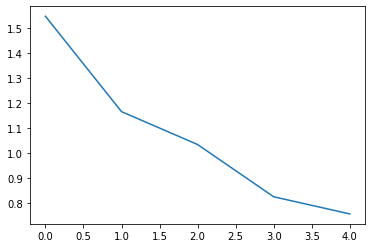

In [ ]:
train_loss = [1.5488127215305965, 1.166993721564611, 1.0353109547694523, 0.8261136894822121,0.7575275759299596]
plt.plot(train_loss)